# Problem set 2-Computational Physics.
# Matheus Azevedo Silva Pessôa, ID: 260889844

1. a) Write a function that models the log base 2 of x valid from 0.5 to 1 to
an accuracy in the region better than 10 −6 . Please use a truncated Chebyshev
polynomial fit to do this, and please write your own fit routine (instead of just
calling the numpy one). How many terms do you need? Carry out a least
squares polynomial fit of the same order, and overplot the residuals. How do
the max errors compare? How about the RMS? Feel free to use a built-in routine
for the second fit.

Here, I use a modified version of what we did in class.

('rms error for least-squares is ', 1.6740220590023954e-07, ' with max error ', 8.075398715279292e-07)
('rms error for chebyshev     is ', 1.9186754330927136e-07, ' with max error ', 3.1969783731433665e-07)


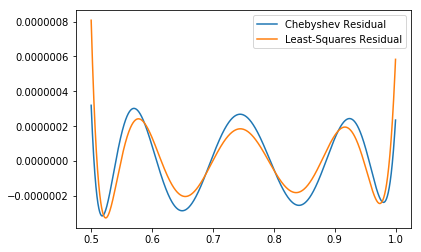

In [19]:
import numpy as np
from matplotlib import pyplot as plt

def cheb_mat_uniform(nx,ord):
    x=np.linspace(-1,1,nx)
    mat=np.zeros([nx,ord+1])
    mat[:,0]=1.0
    if ord>0:
        mat[:,1]=x
    if ord>1:
        for i in range(1,ord):
            mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    return mat

n=5000
ord=150
mat=cheb_mat_uniform(n,ord)
x = np.linspace(0.5,1,n) #making for the range we have been asked for.
y=np.log2(x)

#Now using Least-Squares method
lhs=np.dot(mat.transpose(),mat)
rhs=np.dot(mat.transpose(),y)
fitp=np.dot(np.linalg.inv(lhs),rhs)

ncoeff=8
pred=np.dot(mat[:,:ncoeff],fitp[:ncoeff])

lhs2=np.dot(mat[:,:ncoeff].transpose(),mat[:,:ncoeff])
rhs2=np.dot(mat[:,:ncoeff].transpose(),y)
fitp2=np.dot(np.linalg.inv(lhs2),rhs2)
pred2=np.dot(mat[:,:ncoeff],fitp2)

plt.clf();plt.plot(x,pred-y);plt.plot(x,pred2-y);
plt.legend(['Chebyshev Residual','Least-Squares Residual'])
plt.savefig('cheb_lss_resids.png')

print('rms error for least-squares is ',np.sqrt(np.mean((pred2-y)**2)),' with max error ',np.max(np.abs(pred2-y)))
print('rms error for chebyshev     is ',np.sqrt(np.mean((pred-y)**2)),' with max error ',np.max(np.abs(pred-y)))

b) Now extend your function to take the log base 2 of any positive number.
The function numpy.frexp may come in handy here.

('rms error for least-squares is ', 0.09517297330537891, ' with max error ', 1.6224468926549718)
('rms error for chebyshev     is ', 0.13291041700104922, ' with max error ', 0.9791195297611792)


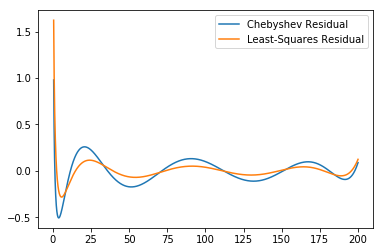

In [50]:
import numpy as np
from matplotlib import pyplot as plt

def cheb_mat_uniform(nx,ord):
    x=np.linspace(-1,1,nx)
    mat=np.zeros([nx,ord+1])
    mat[:,0]=1.0
    if ord>0:
        mat[:,1]=x
    if ord>1:
        for i in range(1,ord):
            mat[:,i+1]=2*x*mat[:,i]-mat[:,i-1]
    return mat

n=5000
ord=150
mat=cheb_mat_uniform(n,ord)
x = np.linspace(0.5,200,n)
xx=np.frexp(x)
mantissa=xx[0]
exp=xx[1]
y=np.log2(mantissa)+exp

#we'll do a least-squares fit, details coming Friday
lhs=np.dot(mat.transpose(),mat)
rhs=np.dot(mat.transpose(),y)
fitp=np.dot(np.linalg.inv(lhs),rhs)

tolerance=1E-6
np.sum(np.abs(fitp)>=tolerance)
mylist=fitp[0:np.sum(np.abs(fitp)>=tolerance)]

ncoeff=8
pred=np.dot(mat[:,:ncoeff],fitp[:ncoeff])

lhs2=np.dot(mat[:,:ncoeff].transpose(),mat[:,:ncoeff])
rhs2=np.dot(mat[:,:ncoeff].transpose(),y)
fitp2=np.dot(np.linalg.inv(lhs2),rhs2)
pred2=np.dot(mat[:,:ncoeff],fitp2)

plt.clf();plt.plot(x,pred-y);plt.plot(x,pred2-y);
plt.legend(['Chebyshev Residual','Least-Squares Residual'])
plt.savefig('cheb_lss_resids.png')

print('rms error for least-squares is ',np.sqrt(np.mean((pred2-y)**2)),' with max error ',np.max(np.abs(pred2-y)))
print('rms error for chebyshev     is ',np.sqrt(np.mean((pred-y)**2)),' with max error ',np.max(np.abs(pred-y)))

## Problem 2

Look at the file 229614158 PDCSAP SC6.txt (thanks to Matt Lundy).
This is an optical light curve from a flaring M-dwarf star observed by the HESS
telescope. You can read the data with np.loadtxt(’229614158 PDCSAP SC6.txt’,delimiter=’,’).
The first column is time, the second column is flux, and I believe we can ignore
the third column. We’ll model the flare as an exponential decay starting sharply
at some time. Is this model linear? What would your model look like, and what
are approximate starting guess values? Plot the data and your starting guess,
zoomed into the flare region (around t=1706).

Here is the complete view of the dataset.

Text(20.625,0.5,'Flux')

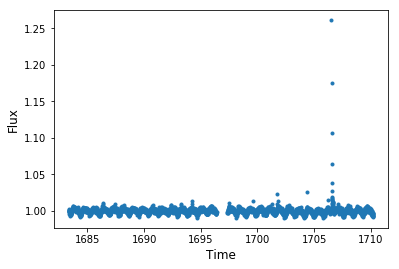

In [16]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

data = np.loadtxt('229614158 PDCSAP SC6.txt', delimiter=',')
time=data[:,0]
timelist=time.tolist()
flux=data[:,1]
fluxlist=flux.tolist()

plt.plot(timelist,fluxlist,'.')
plt.xlabel("Time",fontsize='large')
plt.draw()
plt.ylabel("Flux",fontsize='large')

I selected manually the area of interest for my first guess, using an exponential function, since it is just the flare we are seeking to model, and not the complete behavior of the function.

Text(20.625,0.5,'Flux')

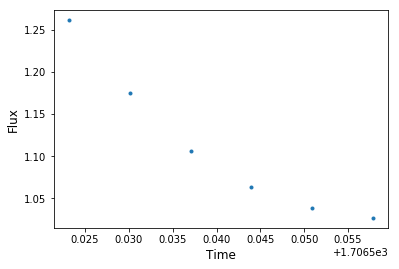

In [17]:
data = np.loadtxt('selected_data.txt', delimiter=',')
time=data[:,0]
timelist=time.tolist()
flux=data[:,1]
fluxlist=flux.tolist()

plt.plot(timelist,fluxlist,'.')
plt.xlabel("Time",fontsize='large')
plt.draw()
plt.ylabel("Flux",fontsize='large')

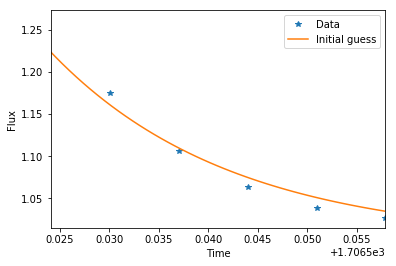

In [9]:
alpha=55
c=1
a=0.28
t0=1706.52
x=np.linspace(time[0],time[-1])
f=[a*np.exp(-alpha*(t-t0))+c for t in x]

plt.plot(time, flux, '*', label='Data')
plt.plot(x, f, label='Initial guess')
plt.xlabel('Time')
plt.xlim(time[1]-0.006,time[-1])
plt.ylabel('Flux')
plt.legend()
plt.show()

b) Keeping the flare starting time fixed (floating that is tricky given that
the time is discretized), write a function using Newton’s method to fit flare
parameters by minimizing χ 2 . If your starting guess is reasonable, you should
not need to switch to Levenberg-Marquardt. What are your best-fit parameters?
Add your best-fit model to your zoomed-in plot from part a).


To find the best fit parameters, we use some of the linear algebra presented in the example we made in class for a Gaussian distribution. 

Best-fit parameters found:
a = 0.33057746011348443
alpha = 60.37258956237804
c = 0.9896472941507323


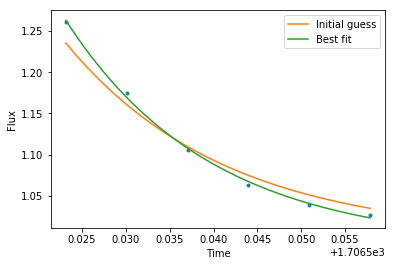

In [15]:
def model_derivs(pars, x, t0):
    a = pars[0]
    alpha = pars[1]
    c = pars[2]
    expvec = np.asarray([np.exp(-alpha*(t-t0)) for t in x])
    fun = a*expvec+c
    da = expvec
    dalpha = (t0-x)*a*expvec
    dc = 1.0
    derivs = np.zeros([len(x), len(pars)])
    derivs[:,0] = da
    derivs[:,1] = dalpha
    derivs[:,2] = dc
    return fun, derivs
n = 2
pars = [a, alpha, c]
tfun = np.zeros([len(x), n+1])

fun, derivs = model_derivs(pars, time, t0)
resid = flux - fun
fun1, _ = model_derivs(pars, x, t0)
tfun[:,0] = fun1

for i in range(1,n+1):    
    grad = 2*np.dot(derivs.transpose(), resid)
    curve = 2*np.dot(derivs.transpose(), derivs)
    covariance = np.linalg.inv(curve)
    pars = pars + np.dot(covariance, grad)
    
    fun, derivs = model_derivs(pars, time, t0)
    resid = flux - fun
    fun1, _ = model_derivs(pars, x, t0)
    all_fun[:,i] = fun1

print('Best-fit parameters found:\na = '+repr(pars[0])+'\nalpha = '+repr(pars[1])+'\nc = '+repr(pars[2]))

plt.plot(time, flux, '.')
plt.plot(x, f, label='Initial guess')
plt.plot(x, fun1, label='Best fit')
plt.xlabel('Time')
plt.ylabel('Flux')
plt.legend()
plt.show()

c) What are your estimates for the errors on the fit parameters? Please ex-
plain how you modelled them, and comment on if you think they are reasonable.

In [11]:
errora=np.diag(covariance)[0]
erroralpha= np.diag(covariance)[1]
errorc= np.diag(covariance)[2]

print('Pure errors for a, alpha and c:',errora,erroralpha,errorc)
print('Standard deviation for a, alpha and c:',np.sqrt(errora),np.sqrt(erroralpha),np.sqrt(errorc))
print('Percentage errors for a, alpha and c:',errora/a,erroralpha/alpha,errorc/c)

('Pure errors for a, alpha and c:', 1.5419109980546284, 661079.7613780542, 2.2224264224006154)
('Standard deviation for a, alpha and c:', 1.2417370889421917, 813.0681160751873, 1.490780474248511)
('Percentage errors for a, alpha and c:', 5.506824993052244, 12019.63202505553, 2.2224264224006154)


We can conclude that the errors are not plausible with what we would like to use (the diagonal of the covariance matrix that represents the error in the linear algebra formulation), even when considering a diminushed number of datasets. The standard deviation (square root of the diagonals) also provides a bad result.

d) Looking at the full span of the data, do you trust the errors you came up
with in part c)? Why or why not?

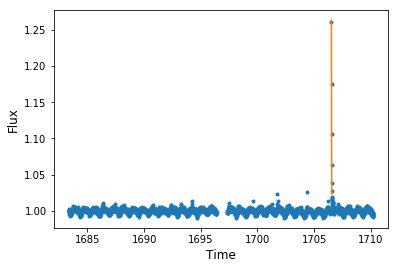

In [14]:
data2 = np.loadtxt('229614158 PDCSAP SC6.txt', delimiter=',')
time2=data2[:,0]
timelist2=time2.tolist()
flux2=data2[:,1]
fluxlist2=flux2.tolist()

plt.plot(timelist2,fluxlist2,'.')
plt.xlabel("Time",fontsize='large')
plt.draw()
plt.ylabel("Flux",fontsize='large')
plt.plot(x, fun1, label='Best fit')

I do not agree with the errors presented using this method since we consider a really small number of points and even though the method provides us big errors. 